# **Projeto de Governaça em TI | S01/2022**

__Professor__: Edson M. Souza

__Discplina__: Ciência de Dados

__Projeto__: Governança de TI

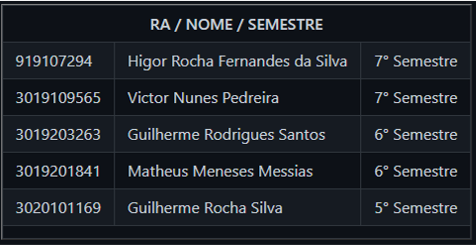

----------------------------------------------
# **Objetivo**

Neste Semestre o novo desafio foi realizar uma Análise de Dados completa sobre Acidentes Aéreos Ocorridos no Brasil de 2010 a 2019. O ponto principal e mais importante é a aplicação das técnicas de ciência de dados aprendidas durante as aulas.

Por muitos anos os aviões tem sido considerados o segundo meio de transporte mais seguro do mundo. Cobrindo longas viagens em um curto espaço de tempo, algumas aeronaves proveram diversas vantagens para o mundo. Mas, infelizmente, como todo meio de transporte, as aeronaves possuem sua conta de tragédias. 

O último caso, até a data de publicação deste estudo foi o acidente do avião da **LAMIA**, que transportava o **time de futebol da Chapecoense** para a final de um campeonato na Colombia. O caso reacendeu discursões, destacando a segurança dos aviões e até onde a capacitação humana influência no desenrolar de um incidente.

----------------------------------------------
# **Bibliotecas**

Para iniciar o projeto temos uma breve explicação + importação das bibliotecas que serão utilizadas para o desenvolvimento do código.

* **Pandas:** Essa é a biblioteca perfeita para iniciar suas análises exploratórias de dados, pois ela nos permite ler, manipular, agregar e plotar os dados em poucos passos (**Medium**, 2020).

* **Numpy:** Fornece um grande conjunto de funções e operações de biblioteca que ajudam os programadores a executar facilmente cálculos numéricos. Esses tipos de cálculos numéricos são amplamente utilizados em tarefas como: Machine learning, Processo de imagem e Computação grafica e Tarefas matemáticas. (**Medium**, 2018)

* **Matplotlib:** O Matplotlib é uma biblioteca para a visualização de dados em Python. Ele apresenta uma API orientada a objetos que permite a criação de gráficos em 2D de uma forma simples e com poucos comandos. (**King Host**, 2018)

* **Seaborn:** O Seaborn ajuda a visualizar as relações estatísticas. Para entender como as variáveis ​​em um conjunto de dados estão relacionadas umas às outras e como essa relação depende de outras variáveis, realizamos análises estatísticas. (**Acervolima**, 2022)

* **Scipy/scipy.stats:** A biblioteca SciPy disponibiliza muitas funcionalidades de computação científica implementadas de forma eficiente, incluindo integração numérica, interpolação, otimização, álgebra linear e Estatística. A documentação completa pode ser encontrada em docs.scipy.org/doc. (**GitHub**, 2021)

* **Collections counter:** Este módulo implementa tipos de dados de contêineres especializados que fornecem alternativas aos contêineres embutidos do Python, `dict`, `list`, `set` e `tuple`. (**Python**, 2022)

* **Pywaffle:** Um gráfico de waffle é uma técnica de visualização envolvente que normalmente é criada para exibir o progresso em direção aos objetivos. Onde cada célula no Waffle Chart constitui 10 X 10 uma grade de células em que cada célula representa um ponto percentual totalizando 100%.

In [ ]:
import numpy as np # para calculos lineares
import pandas as pd # para os arquivos CSV/XLXS (pd.read_XXX)

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from collections import Counter
import statistics as static

In [ ]:
# Instalando o pywaffle
!pip install pywaffle -q

In [ ]:
# Importando as bibliotecas necessárias para o pywaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle

----------------------------------------------
# **Importação dos dados**

Neste passo, é de extrema importância o cuidado para importação dos dados a serem utilizados nas consultar. Seguimos com a importação dos dados do *CENIPA*, das ocorrências de Acidentes Aéreos (**2010 a 2019**):

In [ ]:
#importação dos dados CENIPA Local
dadosCenipa = pd.read_csv ('/content/ocorrencias_cenipa.csv')

# **Adicionando valores nas colunas**

Neste passo, estamos utilizando o código para adicionar o valor do item em cada coluna nos gráficos, seja ele horizontal, vertical ou demais.

In [ ]:
#exibir dados no gráfico quando este for em barras horizontais
def valor_coluna(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# **Criando funções**

Mostrando a criação de algumas funções que foram aprendidas em aula e, poderão em algum momento ser utilizar no projeto, principalmente enquanto está em desenvolvimento.

In [ ]:
# HEAD.() = primeiras 5 linhas do quadro de dados são retornadas

def verificacao(DataSet):
  return DataSet.head()
verificacao(dadosCenipa)

In [ ]:
# DTYPES = retorna a classificação dos dados de cada coluna

def verificacao(DataSet):
  return DataSet.dtypes
verificacao(dadosCenipa)

In [ ]:
# INFO() = retorna informações como Colunas, tipos de dados, número de linhas, entre outros.

def verificacao(DataSet):
  return DataSet.info()
verificacao(dadosCenipa)

In [ ]:
# SHAPE = retorna a quantidade de linhas e colunas

def verificacao(DataSet):
  return DataSet.shape
verificacao(dadosCenipa)

# **Curiosidade sobre o Pywaffle**

Este item esta entrando no trabalho mais como uma curiosidade encontrada enquanto o grupo realizava pesquisas na internet. É um estilo de gráfico que foge um pouco dos tradicionais e pode trazer uma dinâmica interessante.

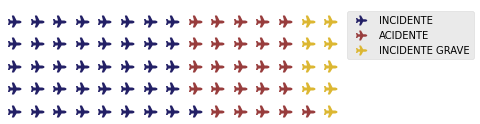

In [ ]:
#importação dos dados CENIPA Online
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv")

# extraindo value counts da variavel ocorrencia_classificacao
data = df.ocorrencia_classificacao.value_counts().to_dict()

# plotando gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#232066", "#983D3D", "#DCB732"),
                values=data, icons='plane', icon_size=12,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();


---

#  ❗***A partir deste item se inicia realmente o Projeto mostrando a analise aos dados de ocorrências de Acidentes Aéreos (2010 a 2019)***❗

-------------------------------------------
# ▶ **Total de Ocorrências de 2010 a 2019**

Para iniciar nosso projeto, é de extrema importância que todos tenham ciência da quantidade de incidentes que ocorreram neste período, pois, é o número em que iremos trabalhar.

In [ ]:
print('Total de Incidentes de 2010 a 2019 foram de:', len(dadosCenipa))

Total de Incidentes de 2010 a 2019 foram de: 5242


# ▶ **Principais Ocorrências de 2010 a 2019**

Como uma segunda informação de extrema importância no projeto, é sabermos quais as principais ocorrências no período informado, ou seja, qual foi o motivo dessas ocorrências serem as principais.

In [ ]:
# Realizando a contagem de itens separando por Descrição

descricao = Counter(dadosCenipa['descricao'])
fase_descricao = sorted(descricao, key = descricao.get, reverse = True)
contador_descricao = sorted(list(descricao.values()), reverse = True)

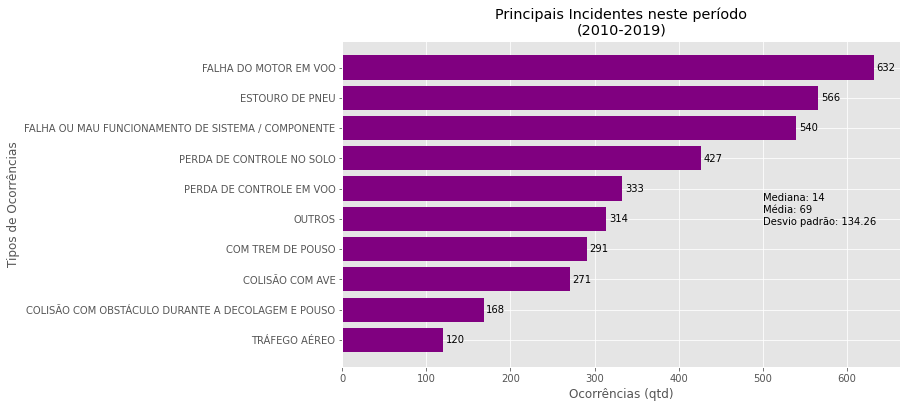

In [ ]:
# Criação do Gráfico Introdução 01

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(10, 6))

x=fase_descricao[:10]
y=contador_descricao[:10]

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

# Dando cor aos dados
ax.barh(x, y, color='purple')

# Dando título a visualização
ax.invert_yaxis()
plt.xlabel('Ocorrências (qtd)')
plt.ylabel('Tipos de Ocorrências')
plt.title('Principais Incidentes neste período\n(2010-2019)')

# Adicionando as análises matemáticas
plt.text(500, 4.4, 'Mediana: %d'%(np.median(np.array(contador_descricao))))
plt.text(500, 4.8, 'Média: %d'%(np.mean(np.array(contador_descricao))))
plt.text(500, 5.2, 'Desvio padrão: %.2f'%(static.stdev(contador_descricao)))

plt.show()

**Análise em cima do gráfico anterior**

- Podemos observar que no período informado, a ocorrência que mais se relatou totalizando **632** casos foi **Falha no Motor em Voo**.

- As ocorrências que menos se apresentaram (1) foram: Hipóxia, Relacionado com Security, Causado por Ricochete,IMC não intencional,Perda de Separação/Colisão em voo e Explosão. (dado retirado manual da base de dados)

- **Curiosidade:** Se um motor parar de funcionar o avião corre o risco de cair. MITO! A aeronaves são projetadas para voar sem dificuldades com apenas um motor. No entanto, por precaução, nos raros casos onde há problemas com um dos motores, o piloto é orientado a interromper a viagem e pousar num aeroporto próximo.

# ▶ **O que foi Acidente, Incidente ou Incidente Grave?**

Finalizando esta introdução do projeto, temos abaixo a visualização da quantidade por Tipo de Ocorrências. 

**Observação:**
- Incidente aeronáutico por definição, é toda ocorrência inclusive de tráfego aéreo associada a operação de uma aeronave, havendo intenções de vôo, que não se chegue a se caracterizar como um acidente mas que afete ou possa afetar a segurança da operação.

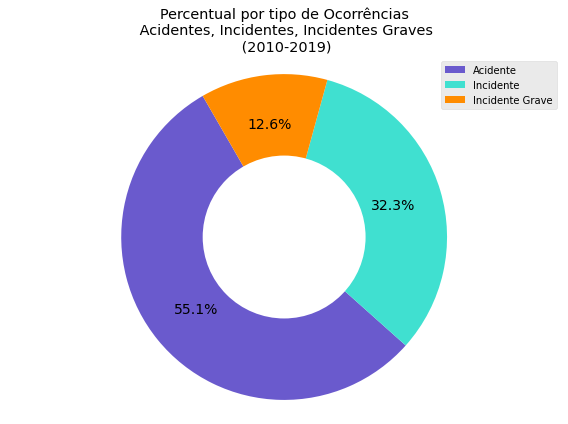

In [ ]:
# Criação do Gráfico Introdução 02

plt.style.use("ggplot")

# Definindo cores e legenda dos dados
colors = ['#6A5ACD', '#40E0D0', '#FF8C00']
labels_ocorr_faseOpr = ['Acidente', 'Incidente', 'Incidente Grave']
plt.figure(figsize=(8, 6))

# Puxando os dados e fazendo a contagem
tipo_ocorr_faseOpr = dadosCenipa['tipo'].value_counts()

plt.pie(tipo_ocorr_faseOpr, colors=colors, autopct='%1.1f%%', pctdistance=0.7, startangle=120, textprops={'fontsize': 14})
plt.legend(labels=labels_ocorr_faseOpr, loc="upper right")

# Dando título a visualização
plt.title(label='Percentual por tipo de Ocorrências\n Acidentes, Incidentes, Incidentes Graves\n (2010-2019)', loc='Center')
center_circle = plt.Circle((0,0),0.5, color='black', fc='white', linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.tight_layout()

plt.show()

----------------------------------------------
# ▶ **Ocorrências por Região do Brasil**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes por cada Região Brasileira.

In [ ]:
# Divisão das regiões para plotar no gráfico
df_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
              'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
              'Centro Oeste': ['MT', 'MS', 'GO'], 
              'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
              'Sul': ['PR', 'RS', 'SC']}

# Divisão por tipo de acidente
tipos = ['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE']

# Criando o diciónario separado por região do Brasil
dic_01 = {i: [ len([k for k in list(dadosCenipa.loc[dadosCenipa['tipo'] == i, ['estado']]['estado'])
                    if k in df_regioes[j]]) for j in df_regioes.keys()] for i in tipos}

dic_01['Região'] = list(df_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)

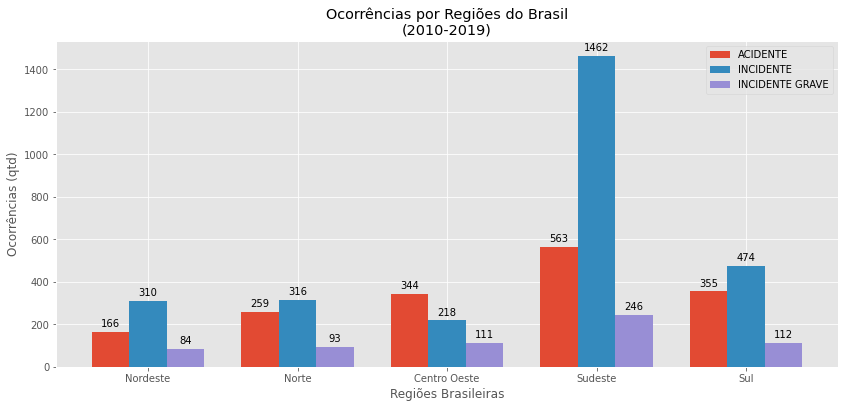

In [ ]:
# Criação do Gráfico 01

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(14, 6))

width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1]
r3 = [ x + width for x in r2]

# Separando a Legenda por tipo de Incidente
coluna1 = ax.bar(r1, dados_regioes['ACIDENTE'], width, label='ACIDENTE')
coluna2 = ax.bar(r2, dados_regioes['INCIDENTE'], width, label='INCIDENTE')
coluna3 = ax.bar(r3, dados_regioes['INCIDENTE GRAVE'], width, label='INCIDENTE GRAVE')

# Dando título a visualização
ax.set_ylabel('Ocorrências (qtd)')
ax.set_xlabel('Regiões Brasileiras')
ax.set_title('Ocorrências por Regiões do Brasil\n(2010-2019)')
ax.set_xticks(r2)
ax.set_xticklabels(dados_regioes['Região'])
ax.legend()

valor_coluna(coluna1, ax)
valor_coluna(coluna2, ax)
valor_coluna(coluna3, ax)
plt.show()

**Análise em cima do gráfico anterior**

- A região do Brasil que mais relata ocorrências aéreas é o **Sudeste**, em ambos casos de Acidente (563), Incidente (1462) e Incidente Grave (246). 

- A região do Brasil que menos relata ocorrências aéreas em casos de Acidentes (166) e Incidentes Graves (84) é o **Nordeste**.

- A região do Brasil que menos relata ocorrências aéreas em casos de Incidentes (218), é o **Centro-Oeste**.

# ▶ **Ocorrências por Estados do Brasil**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes por cada Estado Brasileiro.


In [ ]:
# Realizando a contagem de itens separando por estado do País

ocorr_estado = Counter(dadosCenipa['estado'])
fase_estado = sorted(ocorr_estado, key = ocorr_estado.get, reverse = True)
contador_estado = sorted(list(ocorr_estado.values()), reverse = True)

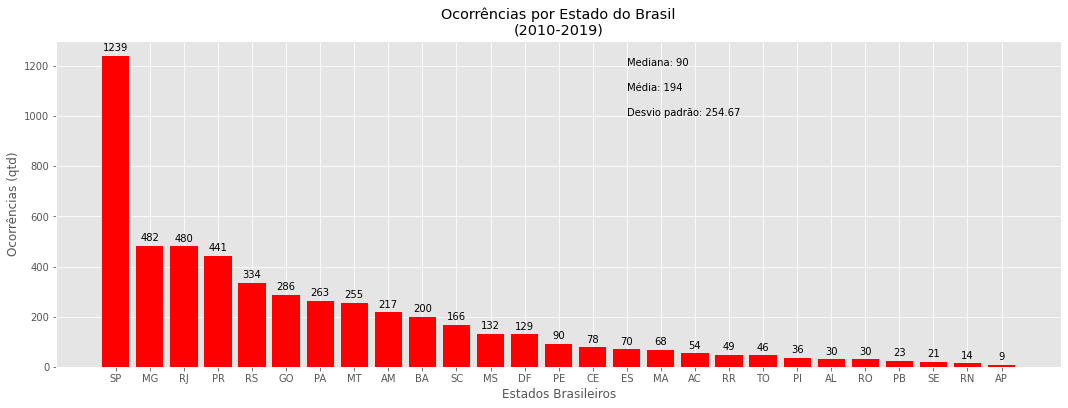

In [ ]:
# Criação do Gráfico 02

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 6))

x=fase_estado
y=contador_estado

# Dando cor aos dados
rects1 = ax.bar(x, y,color='Red')

# Dando título a visualização
ax.set_xticks(x)
plt.ylabel("Ocorrências (qtd)")
plt.xlabel("Estados Brasileiros")
plt.title('Ocorrências por Estado do Brasil\n(2010-2019)')

# Adicionando as análises matemáticas
plt.text(15, 1200, 'Mediana: %d'%(np.median(np.array(contador_estado))))
plt.text(15, 1100, 'Média: %d'%(np.mean(np.array(contador_estado))))
plt.text(15, 1000, 'Desvio padrão: %.2f'%(static.stdev(contador_estado)))   

valor_coluna(rects1, ax)
plt.show()
               

**Análise em cima do gráfico anterior**

- O estado do Brasil em que mais se concentrou as ocorrências aéreas no periodo de 2010 a 2019 foi **São Paulo - SP** com **1239**.

- o estado do Brasil em que menos se concentrou as ocorrências aéreas no periodo de 2010 a 2019 foi **Amapá - AP** com **9** casos.

- A média calculada neste caso só ficou elevada assim (**194**) devido a grande concentração em SP, como pudemos analisar.

# ▶ **Ocorrências por Cidades do Brasil**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes por cada Cidade Brasileira.

In [ ]:
# Realizando a contagem de itens separando por cidades do País

ocorr_cidades = Counter(dadosCenipa['cidade'])
labels_cidades = sorted(ocorr_cidades, key=ocorr_cidades.get, reverse=True)
dados_cidades = sorted(list(ocorr_cidades.values()), reverse=True)

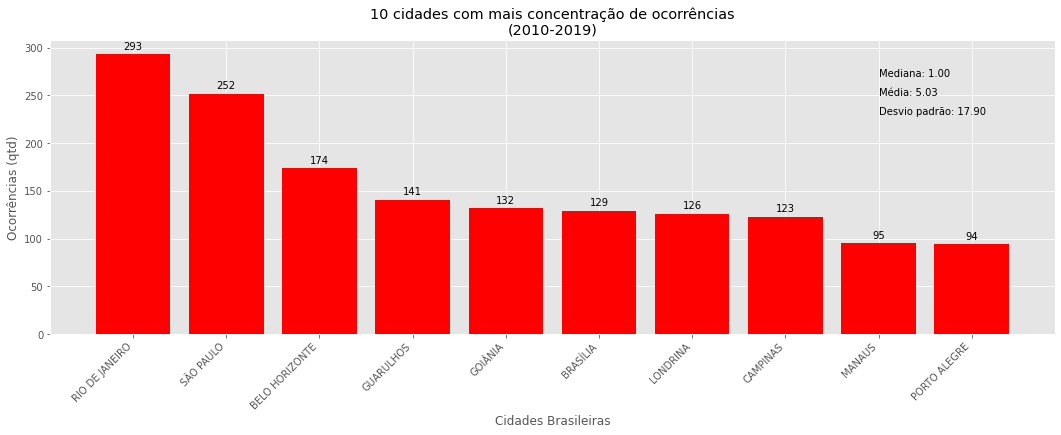

In [ ]:
# Criação do Gráfico 03

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 6))
fig.autofmt_xdate(rotation=45)

# Dando cor aos dados
rects = ax.bar(x, y, color='red')

# Separa apenas os dez primeiros dados dos arrays
x = labels_cidades[:10]
y = dados_cidades[:10]

# Dando título a visualização
ax.set_xticks(x)
plt.ylabel("Ocorrências (qtd)")
plt.xlabel("Cidades Brasileiras")
plt.title('10 cidades com mais concentração de ocorrências\n(2010-2019)')

# Adicionando as análises matemáticas
plt.text(8, 270, 'Mediana: %.2f'%(np.median(np.array(dados_cidades))))
plt.text(8, 250, 'Média: %.2f'%(np.mean(np.array(dados_cidades))))
plt.text(8, 230, 'Desvio padrão: %.2f'%(static.stdev(dados_cidades)))

valor_coluna(rects, ax)
plt.show()

**Análise em cima do gráfico anterior**

- A cidade do Brasil em que mais se concentrou as ocorrências aéreas no periodo de 2010 a 2019 foi **Rio de Janeiro** com **293** casos.

- A cidade do Brasil em que menos se concentrou as ocorrências aéreas no periodo de 2010 a 2019 foi **Porto Alegre** com **94** casos.

- A porcentagem de ocorrências destas 10 principais cidades corresponde a 29% do total

---

# ▶ **Ocorrências por Hora**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes pelo Horário que aconteceu, inclusive, uma informação muito **IMPORTANTE**, pois conseguimos ter uma noção se foi a noite, um dos horários mais temidos pelos passageiros.

In [ ]:
# Realizando a contagem de itens separando pela Hora do Incidente

ocorr_hora = Counter(dadosCenipa['hora'])
labels_hora = sorted(ocorr_hora, key=ocorr_hora.get, reverse=True)
dados_hora = sorted(list(ocorr_hora.values()), reverse=True)

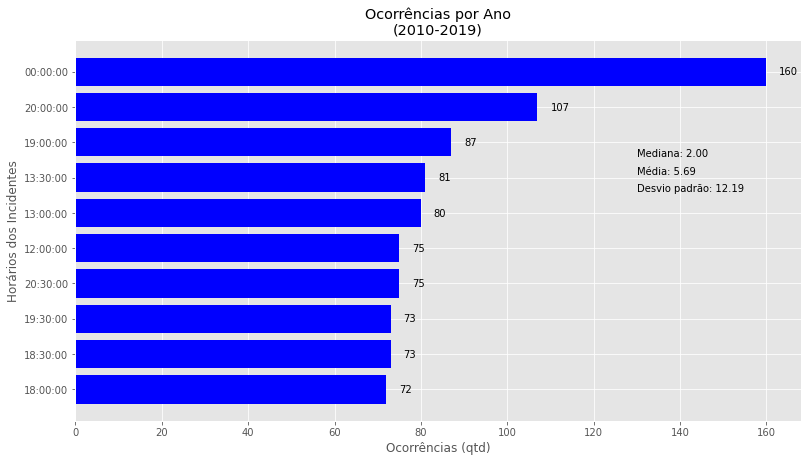

In [ ]:
# Criação do Gráfico 04

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=labels_hora[:10]
y=dados_hora[:10]

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

# Dando cor aos dados
ax.barh(x, y, color='blue')

# Dando título a visualização
plt.ylabel("Horários dos Incidentes")
plt.xlabel("Ocorrências (qtd)")
plt.title('Ocorrências por Ano\n(2010-2019)')

# Adicionando as análises matemáticas
plt.text(130, 2.4, 'Mediana: %.2f'%(np.median(np.array(dados_hora))))
plt.text(130, 2.9, 'Média: %.2f'%(np.mean(np.array(dados_hora))))
plt.text(130, 3.4, 'Desvio padrão: %.2f'%(static.stdev(dados_hora)))

ax.invert_yaxis()
plt.show()

**Análise em cima do gráfico anterior**

- Conforme haviamos mencionado na introdução deste item, ao analisar o gráfico, notamos que horário em que mais relataram ocorrências foi **00:00** com 160 casos.

- *´O risco de um piloto ou copiloto da aviação comercial brasileira falhar de forma grave é cerca de **50% maior** quando sua escala de trabalho se prolonga entre a **meia-noite e as 6 horas da manhã**. A cada 100 horas de voo realizadas durante a madrugada, os comandantes de jato cometem, em média, 9,5 erros de nível 3, o mais perigoso para a segurança da aeronave.'*

- A quantidade dos 10 horários com mais ocorrências representa **16,84%** do total de ocorrências.


# ▶ **Ocorrências por Dia**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes por cada dia, mas antes extraindo a contagem de uma data.

In [ ]:
# Realizando a extração da quantidade em cima da data usando LAMBDA

dadosCenipa['data'] = pd.to_datetime(dadosCenipa['data'])
dadosCenipa['Mes'] = dadosCenipa['data'].map(lambda x: x.month)
dadosCenipa['Dia'] = dadosCenipa['data'].map(lambda x: x.day)

In [ ]:
# Realizando a contagem de itens separando por Dia

ocorr_dia = Counter(dadosCenipa['Dia'])
labels_dia = sorted(ocorr_dia, key=ocorr_dia.get, reverse=True)
dados_dia = sorted(list(ocorr_dia.values()), reverse=True)

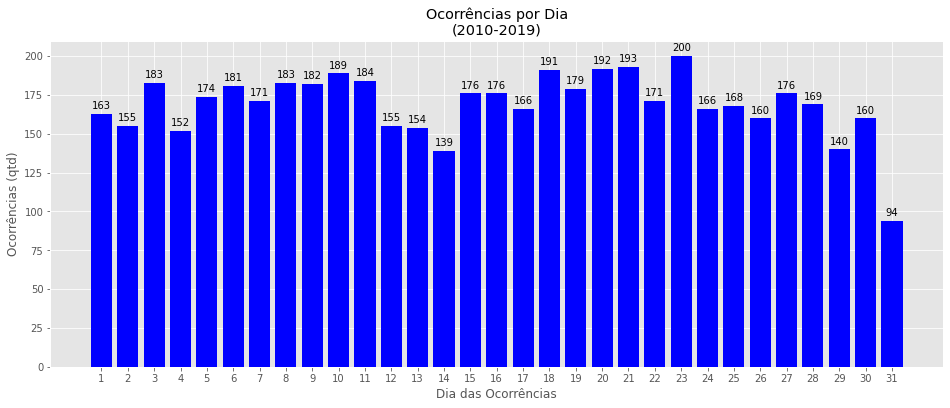

In [ ]:
# Criação do Gráfico 05

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(16, 6))

x = labels_dia
y = dados_dia

# Dando cor aos dados
rects = ax.bar(x, y, color='blue')

# Dando título a visualização
ax.set_xticks(x)
plt.ylabel("Ocorrências (qtd)")
plt.xlabel("Dia das Ocorrências")
plt.title('Ocorrências por Dia\n(2010-2019)')

valor_coluna(rects, ax)
plt.show()

**Análise em cima do gráfico anterior**

- O dia em que ocorreram mais incidentes neste período foi o dia **23** com 200 casos.

- Já o dia em que ocorreram menos incidentes neste período foi o dia **31** com 94 casos.

- A média em decorrência dos dias foi de **169** incidentes.

# ▶ **Ocorrências por Mês**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes por cada Mês, mas antes extraindo a contagem de uma data.

In [ ]:
# Realizando a contagem de itens separando por Mês

ocorr_mes = Counter(dadosCenipa['Mes'])
labels_mes = sorted(ocorr_mes, key=ocorr_mes.get, reverse=True)
dados_mes = sorted(list(ocorr_mes.values()), reverse=True)

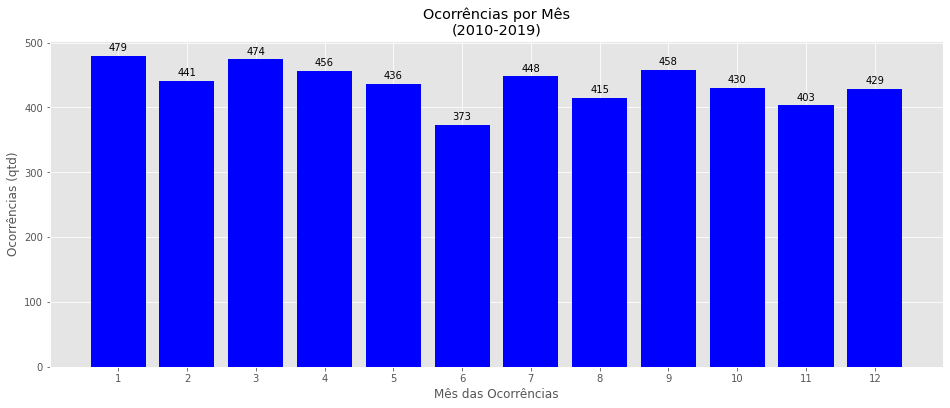

In [ ]:
# Criação do Gráfico 06

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(16, 6))

x = labels_mes
y = dados_mes

# Dando cor aos dados
rects = ax.bar(x, y, color='blue')

# Dando título a visualização
ax.set_xticks(x)
plt.ylabel("Ocorrências (qtd)")
plt.xlabel("Mês das Ocorrências")
plt.title('Ocorrências por Mês\n(2010-2019)')

valor_coluna(rects, ax)
plt.show()

**Análise em cima do gráfico anterior**

- O mês em que ocorreram mais incidentes neste período foi o mês de **Janeiro** com 479 casos.

- Já o mês em que ocorreram menos incidentes neste período foi o mês de **Junho** com 373 casos.

- A média em decorrência dos meses foi de **436** incidentes.

# ▶ **Ocorrências por Ano**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes por cada Ano, mas antes extraindo a contagem de uma data.

In [ ]:
# Realizando a contagem de itens separando por Ano

ocorr_ano = Counter(dadosCenipa['ano'])
labels_ano = sorted(ocorr_ano, key=ocorr_ano.get, reverse=True)
dados_ano = sorted(list(ocorr_ano.values()), reverse=True)

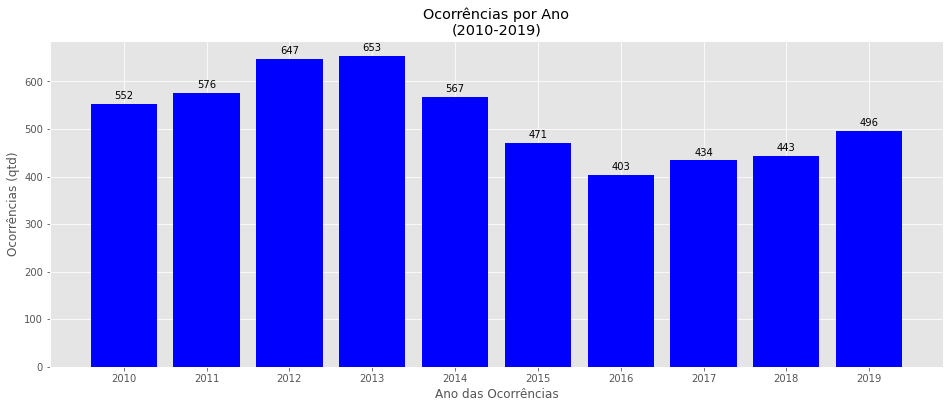

In [ ]:
# Criação do Gráfico 07

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(16, 6))

x = labels_ano
y = dados_ano

# Dando cor aos dados
rects = ax.bar(x, y, color='blue')

# Dando título a visualização
ax.set_xticks(x)
plt.ylabel("Ocorrências (qtd)")
plt.xlabel("Ano das Ocorrências")
plt.title('Ocorrências por Ano\n(2010-2019)')

valor_coluna(rects, ax)
plt.show()


**Análise em cima do gráfico anterior**

- O ano em que ocorreram mais incidentes neste período foi em **2013** com 653 casos.

- Já o ano em que ocorreram menos incidentes neste período foi em **2016** com 403 casos.

- O número total de incidentes de 2010 a 2019 foram de **5242** incidentes.

----------------------------------------------
# ▶ **Ocorrências por Tipo de Aeronave**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes pelo Tipo de Aeronave.

In [ ]:
# Realizando a contagem de itens separando por Tipo de Aeronave

aeronave_tipo = Counter(dadosCenipa['aeronave_tipo'])
tipo = sorted(aeronave_tipo, key = aeronave_tipo.get, reverse = True)
contador_aeronave = sorted(list(aeronave_tipo.values()), reverse = True)

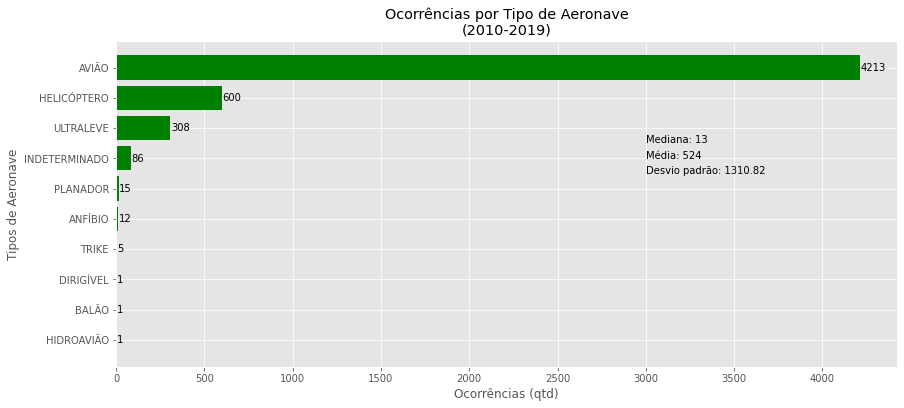

In [ ]:
# Criação do Gráfico 08

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(14, 6))

x=tipo
y=contador_aeronave

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

# Dando cor aos dados
ax.barh(x, y, color='green')

# Dando título a visualização
plt.ylabel("Tipos de Aeronave")
plt.xlabel("Ocorrências (qtd)")
plt.title('Ocorrências por Tipo de Aeronave\n(2010-2019)')

# Adicionando as análises matemáticas
plt.text(3000, 2.5, 'Mediana: %d'%(np.median(np.array(contador_aeronave))))
plt.text(3000, 3.0, 'Média: %d'%(np.mean(np.array(contador_aeronave))))
plt.text(3000, 3.5, 'Desvio padrão: %.2f'%(static.stdev(contador_aeronave)))

ax.invert_yaxis()
plt.show()



**Análise em cima do gráfico anterior**

- De acordo com as informações que o gráfico trouxe, podemos ver claramente que o **Avião** é a aeronave em que mais ocorreu incidentes neste período, totalizando **4213** casos.

- As aeronaves do tipo **Hidroavião**, **Balão** e **Dirigivel**, são os que menos se envolveram em incidentes/acidentes neste período, totalizando juntos apenas **3** casos.


# ▶ **Ocorrências por Tipo de Motor**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes pelo Tipo de Motor do avião envolvido naquele incidente especifico. Um dado onde pode se trazer estudos em como diminuir esses casos, manutenções com maior frequência, entre outros.

In [ ]:
# Realizando a contagem de itens separando por Tipo de Motor

ocorr_motor_tipo = Counter(dadosCenipa['motor_tipo'])
fase_motor_tipo = sorted(ocorr_motor_tipo, key = ocorr_motor_tipo.get, reverse = True)
contador_motor_tipo = sorted(list(ocorr_motor_tipo.values()), reverse = True)

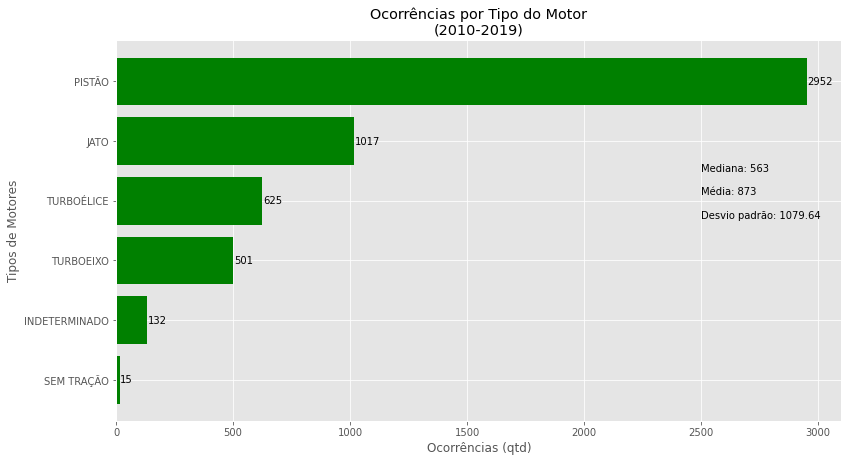

In [ ]:
# Criação do Gráfico 09

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=fase_motor_tipo
y=contador_motor_tipo

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

# Dando cor aos dados
ax.barh(x, y, color='green')

# Dando título a visualização
ax.invert_yaxis()
plt.xlabel('Ocorrências (qtd)')
plt.ylabel('Tipos de Motores')
plt.title('Ocorrências por Tipo do Motor\n(2010-2019)')

# Adicionando as análises matemáticas
plt.text(2500, 1.5, 'Mediana: %d'%(np.median(np.array(contador_motor_tipo))))
plt.text(2500, 1.9, 'Média: %d'%(np.mean(np.array(contador_motor_tipo))))
plt.text(2500, 2.3, 'Desvio padrão: %.2f'%(static.stdev(contador_motor_tipo)))
plt.show()

**Análise em cima do gráfico anterior**

- Podemos observar na visualização acima, que o tipo de motor com ocorrências mais frequentes foi o motor **Pistão** com **2952** casos.

- Já o tipo de motor com menos frequência de ocorrências foi o motor **Sem Tração** com **15** casos.

- A média ficou na faixa dos **873** e seu alto desvio padrão em **1079.64** devido a alta discrepante do motor Pistão.

# ▶ **Ocorrências por Quantidade de Motores**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes pela quantidade de motores da aeronave em questão.

In [ ]:
# Realizando a contagem de itens separando por Quantidade de Motores

ocorr_motor_qtd = Counter(dadosCenipa['aeronave_motor_quantidade'])
fase_motor_quantidade = sorted(ocorr_motor_qtd, key = ocorr_motor_qtd.get, reverse = True)
contador_motor_quantidade = sorted(list(ocorr_motor_qtd.values()), reverse = True)

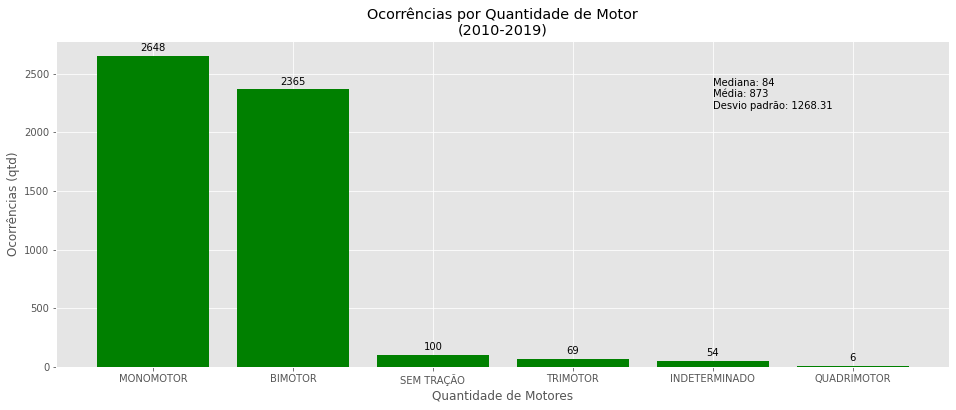

In [ ]:
# Criação do Gráfico 10

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(16, 6))

x=fase_motor_quantidade
y=contador_motor_quantidade

# Dando cor aos dados
rects1=ax.bar(x, y, color='green')
plt.xlabel('')
ax.set_xticks(x)

# Dando título a visualização
plt.ylabel("Ocorrências (qtd)")
plt.xlabel("Quantidade de Motores")
plt.title('Ocorrências por Quantidade de Motor\n(2010-2019)')

# Adicionando as análises matemáticas
plt.text(4, 2400.2, 'Mediana: %d'%(np.median(np.array(contador_motor_quantidade))))
plt.text(4, 2300.4, 'Média: %d'%(np.mean(np.array(contador_motor_quantidade))))
plt.text(4, 2200.5, 'Desvio padrão: %.2f'%(static.stdev(contador_motor_quantidade)))

valor_coluna(rects1, ax)
plt.show()

**Análise em cima do gráfico anterior**

- Podemos observar na visualização acima, que a aeronave com o motor **Monomotor**, ou seja, apenas um motor, foi a que mais teve frequência em incidentes com **2648** casos, isso equivale a **50,51%** do total de ocorrências.

- A aeronave com o motor **Bimotor** não ficou muito para trás, seguiu acompanhamento a primeira, teve nesse período **2635** casos, que é equivalente a **50.26%** do total de ocorrências.

- Já o motor **Quadrimotor** foi o a aeronave que menos apresentou ocorrências, com **6** casos apenas, sendo isso **0.11%** do total.

# ▶ **Ocorrências por Fabricante da Aeronave**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes pelo Fabricante da Aeronave, ou seja, dados que podem trazer para as empresas uma analise maior antes de adquirir a aeronave e para que as fabricantes tenham maior atenção aos seus produtos.

In [ ]:
# Realizando a contagem de itens separando pelo Fabricante da Aeronave

ocorr_aero_fabricante = Counter(dadosCenipa['aeronave_fabricante'])
fase_aero_fabricante = sorted(ocorr_aero_fabricante, key = ocorr_aero_fabricante.get, reverse = True)
contador_aero_fabricante = sorted(list(ocorr_aero_fabricante.values()), reverse = True)

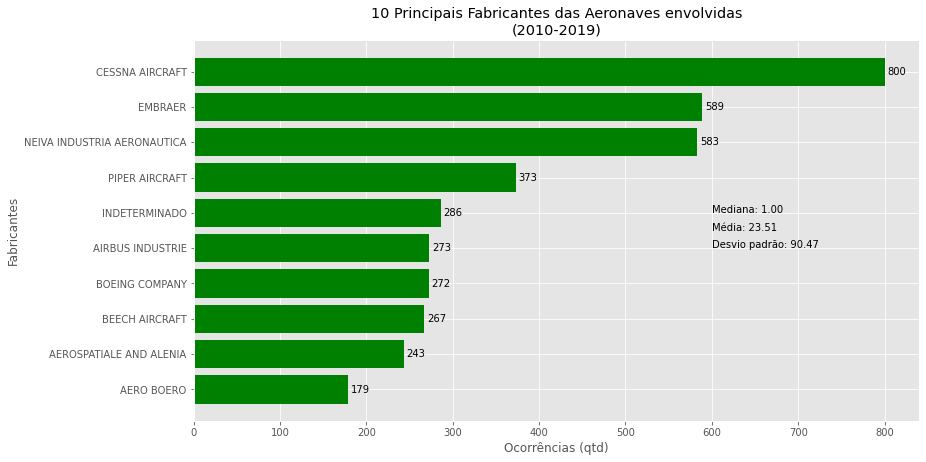

In [ ]:
# Criação do Gráfico 11

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=fase_aero_fabricante[:10]
y=contador_aero_fabricante[:10]

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

# Dando cor aos dados
ax.barh(x, y, color='green')

# Dando título a visualização
plt.xlabel('Ocorrências (qtd)')
plt.ylabel('Fabricantes')
plt.title('10 Principais Fabricantes das Aeronaves envolvidas\n(2010-2019)')

# Adicionando as análises matemáticas
plt.text(600, 4.0, 'Mediana: %.2f'%(np.median(np.array(contador_aero_fabricante))))
plt.text(600, 4.5, 'Média: %.2f'%(np.mean(np.array(contador_aero_fabricante))))
plt.text(600, 5.0, 'Desvio padrão: %.2f'%(static.stdev(contador_aero_fabricante)))

ax.invert_yaxis()
plt.show()

**Análise em cima do gráfico anterior**

- Notamos que dos 10 principais fabricantes, a **Cessna Aircraft** com sede na **Estados Unidos (Kansas)** ficou em 1° lugar, em razão do total de **800** ocorrências envolvendo aeronaves da sua fábrica.

- A fabricante que menos teve casos envolvidos, mas não deixando de ser um número consideravel, foi a **Aero Boero** com sede na **Argentina**, com **179** casos.

- O total de ocorrências destas 10 principais fabricantes correspondem a exatamente **73.73%** do total.

# ▶ **Ocorrências por País Fabricante da Aeronave**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes pelo País Fabricante da Aeronave.


In [ ]:
# Realizando a contagem de itens separando pelo Fabricante da Aeronave

ocorr_aero_paisFab = Counter(dadosCenipa['aeronave_pais_fabricante'])
fase_aero_paisFab = sorted(ocorr_aero_paisFab, key = ocorr_aero_paisFab.get, reverse = True)
contador_aero_paisFab = sorted(list(ocorr_aero_paisFab.values()), reverse = True)

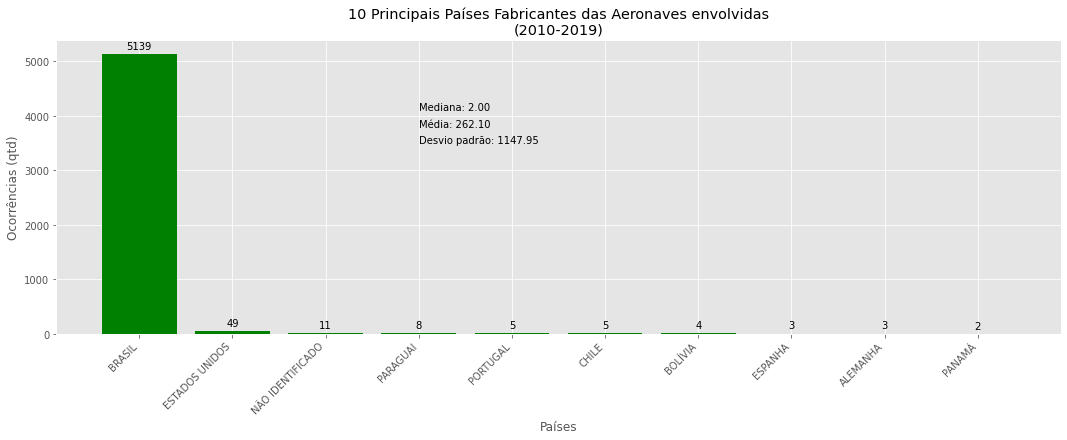

In [ ]:
# Criação do Gráfico 12

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 6))
fig.autofmt_xdate(rotation=45)

x=fase_aero_paisFab[:10]
y=contador_aero_paisFab[:10]

# Dando cor aos dados
rects1=ax.bar(x, y,color='green')
ax.set_xticks(x)

# Dando título a visualização
plt.ylabel("Ocorrências (qtd)")
plt.xlabel("Países")
plt.title('10 Principais Países Fabricantes das Aeronaves envolvidas\n(2010-2019)')

# Adicionando as análises matemáticas
plt.text(3, 4100, 'Mediana: %.2f'%(np.median(np.array(contador_aero_paisFab))))
plt.text(3, 3800, 'Média: %.2f'%(np.mean(np.array(contador_aero_paisFab))))
plt.text(3, 3500, 'Desvio padrão: %.2f'%(static.stdev(contador_aero_paisFab)))

valor_coluna(rects1, ax)
plt.show()

**Análise em cima do gráfico anterior**

- Ao visualizar o gráfico acima, fica claro que das aeronaves envolvidas em incidentes pertencem ao **Brasil** o total de **5139** casos, sendo equivalente a exatos **98%** do total de ocorrências.

- Este número em comparação com o restante é extremamente absurdo, até mesmo comparando com o 2° lugar que é o **Estados Unidos** com **49 casos**.

- Já o país fabricante com menos casos envolvidos é o **Panamá** com **2** apenas.

- A média por País-Fabricante ficou em **262.10** devido a alta do Braisl.

---

# ▶ **Ocorrências por Fase da Operação**

O código a seguir realiza a busca na base de dados filtrando a quantidade de incidentes pela Fase da Operação, ou seja, qual era o trajeto daquela aeronave no momento em que se houve o incidente, como por exemplo Decolagem, pouso, entre outros. 

In [ ]:
# Realizando a contagem de itens separando por Fase da Operação

ocorr_fase_operacao = Counter(dadosCenipa['aeronave_fase_operacao'])
fase_operacao = sorted(ocorr_fase_operacao, key = ocorr_fase_operacao.get, reverse = True)
contador_fase_operacao = sorted(list(ocorr_fase_operacao.values()), reverse = True)

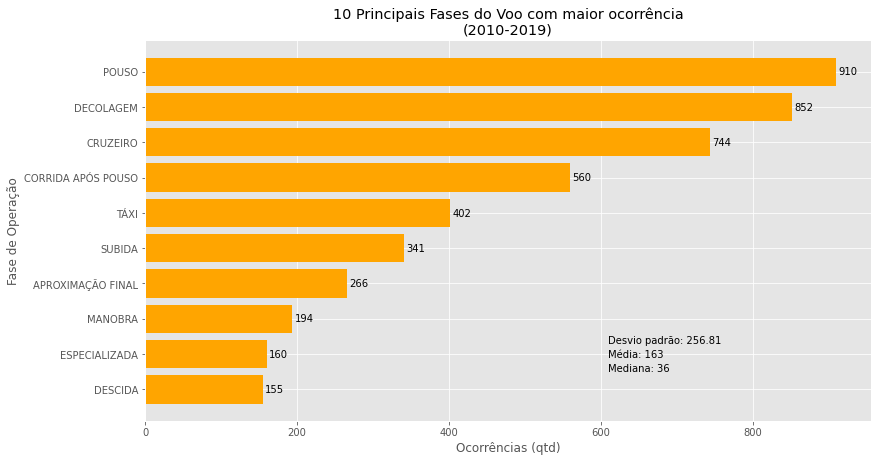

In [ ]:
# Criação do Gráfico 13

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(13, 7))

x=fase_operacao[:10]
y=contador_fase_operacao[:10]

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

# Dando cor aos dados
ax.barh(x, y, color='orange')
ax.invert_yaxis()

# Dando título a visualização
plt.xlabel('Ocorrências (qtd)')
plt.ylabel("Fase de Operação")
plt.title('10 Principais Fases do Voo com maior ocorrência\n(2010-2019)')

# Adicionando as análises matemáticas
plt.text(610, 8.5, 'Mediana: %d'%(np.median(np.array(contador_fase_operacao))))
plt.text(610, 8.1, 'Média: %d'%(np.mean(np.array(contador_fase_operacao))))
plt.text(610, 7.7, 'Desvio padrão: %.2f'%(static.stdev(contador_fase_operacao)))

plt.show()

**Análise em cima do gráfico anterior**

- Observando o gráfico acima, conseguimos verificar que as 3 fases de operação em que mais obtiveram ocorrências envolvidas foi **Pouso (910)**, **Decolagem (852)** e **Cruzeiro (744)**. Segue as definições:
  - ***Pouso:*** Pousar um avião é um dos momentos mais desafiadores e prazerosos para um piloto. Neste momento ele coloca em prática boa parte do que aprendeu e tem a missão de finalizar o voo de maneira tranquila e segura.
  - ***Decolagem:*** A decolagem ou descolagem é a fase inicial do voo de um avião em que o veículo adquire a velocidade necessária para obter a sustentação para alçar voo.
  - ***Cruzeiro:*** Nível de voo que se mantém durante uma etapa considerável da viagem em virtude de, geralmente, a operação da aeronave ser favorecida com velocidade ótima e menor consumo de combustível.


- Já a fase de operação que menos teve ocorrências destas 10 principais, foi a **Descida** com **155** casos. Segue a definição:
  - ***Descida:*** A rampa ideal de descida é de cerca de 3 graus. Em geral, o avião se desloca na proporção de três por um. A cada 1.000 pés que perde de altitude, os aviões se deslocam três milhas náuticas para frente.

- O valor percentual de ocorrências das 10 principais fases da operação das aeronaves envolvidas, corresponde a **87%** do total de ocorrências.


# ▶ **Status das Investigações**

O código a seguir realizada a busca na base de dados filtrando a quantidade de Investigações e seus status, ou seja, investigações já finalizadas, ainda ativas (com ações a serem realizadas) e as investigações indeterminadas, que pararam em algum processo.

In [ ]:
# Divisão de Ocorrências por ANO e STATUS ATIVO

status_ativa = list(set(dadosCenipa['ano']))
dados_status_ativa = list(dadosCenipa.loc[(dadosCenipa['status_investigacao']) == 'ATIVA', ['ano']]
                         ['ano'])
qtd_ativa_ano = pd.DataFrame({'ANO': status_ativa, 'ATIVA': [dados_status_ativa.count(i) for i in status_ativa]})
qtd_ativa_ano = qtd_ativa_ano.sort_values(['ATIVA'])
soma_ativa = qtd_ativa_ano['ATIVA'].sum()

In [ ]:
# Divisão de Ocorrências por ANO e STATUS FINALIZADO

status_finalizada = list(set(dadosCenipa['ano']))
dados_status_finalizada = list(dadosCenipa.loc[(dadosCenipa['status_investigacao']) == 'FINALIZADA', ['ano']]
                         ['ano'])
qtd_finalizada_ano = pd.DataFrame({'ANO': status_finalizada, 'FINALIZADA': [dados_status_finalizada.count(i) for i in status_finalizada]})
qtd_finalizada_ano = qtd_finalizada_ano.sort_values(['FINALIZADA'])
soma_finalizada = qtd_finalizada_ano['FINALIZADA'].sum()

In [ ]:
# Divisão de Ocorrências por ANO e STATUS INDETERMINADO

status_indeterminada = list(set(dadosCenipa['ano']))
dados_status_indeterminada = list(dadosCenipa.loc[(dadosCenipa['status_investigacao']) == 'INDETERMINADA', ['ano']]
                         ['ano'])
qtd_indeterminada_ano = pd.DataFrame({'ANO': status_indeterminada, 'INDETERMINADA': [dados_status_indeterminada.count(i) for i in status_indeterminada]})
qtd_indeterminada_ano = qtd_indeterminada_ano.sort_values(['INDETERMINADA'])
soma_indeterminada = qtd_indeterminada_ano['INDETERMINADA'].sum()

In [ ]:
# Realizando a contagem de itens separando por Status da Investigação

ocorr_status_invest = Counter(dadosCenipa['status_investigacao'])
fase_status_invest= sorted(ocorr_status_invest, key = ocorr_status_invest.get, reverse = True)
contador_status_invest = sorted(list(ocorr_status_invest.values()), reverse = True)

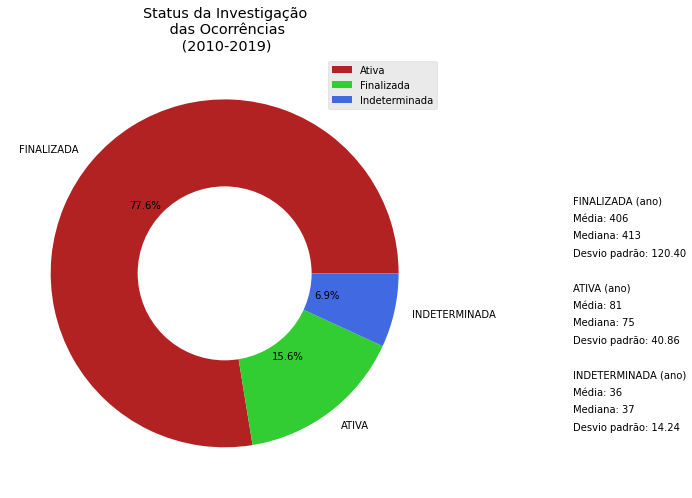

In [ ]:
# Criação do Gráfico 14

plt.style.use("ggplot")

# Formatação do gráfico
colors = ['#B22222', '#32CD32', '#4169E1']
fase_status_invest = ['Ativa', 'Finalizada', 'Indeterminada']

status = dadosCenipa['status_investigacao'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%',label='',figsize=(15,8))
plt.legend(labels=fase_status_invest, loc="upper right")

center_circle = plt.Circle((0,0),0.5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Dando título a visualização
plt.title('Status da Investigação\n das Ocorrências\n (2010-2019)')

# Dados Estatisiticos da Investigação ATIVA
plt.text(2, -0.1, 'ATIVA (ano)')
plt.text(2, -0.2, 'Média: %d'%(np.mean(np.array(qtd_ativa_ano['ATIVA']))))
plt.text(2, -0.3, 'Mediana: %d'%(np.median(np.array(qtd_ativa_ano['ATIVA']))))
plt.text(2, -0.4, 'Desvio padrão: %.2f'%(static.stdev(qtd_ativa_ano['ATIVA'])))

# Dados Estatisiticos do Investigação FINALIZADA
plt.text(2, 0.4, 'FINALIZADA (ano)')
plt.text(2, 0.3, 'Média: %d'%(np.mean(np.array(qtd_finalizada_ano['FINALIZADA']))))
plt.text(2, 0.2, 'Mediana: %d'%(np.median(np.array(qtd_finalizada_ano['FINALIZADA']))))
plt.text(2, 0.1, 'Desvio padrão: %.2f'%(static.stdev(qtd_finalizada_ano['FINALIZADA'])))

# Dados Estatisiticos do Investigação INDETERMINADA
plt.text(2, -0.6, 'INDETERMINADA (ano)')
plt.text(2, -0.7, 'Média: %d'%(np.mean(np.array(qtd_indeterminada_ano['INDETERMINADA']))))
plt.text(2, -0.8, 'Mediana: %d'%(np.median(np.array(qtd_indeterminada_ano['INDETERMINADA']))))
plt.text(2, -0.9, 'Desvio padrão: %.2f'%(static.stdev(qtd_indeterminada_ano['INDETERMINADA'])))

plt.show()

**Análise em cima do gráfico anterior**

- Nota-se que a maior parte teve sua **investigação finalizada** com **4066** casos, representando **77.6%** do total de ocorrências, pois a maior parte das ocorrências são de gravidade baixa. Onde já a menor parte teve sua **Investigação Indeterminada** com **360** casos, representando **6.9%** do total de ocorrências. 


- **Médias por ano das investigações:**
  - A média de ocorrências **Finalizada** foi de **413**;
  - A média de ocorrências **Ativa** foi de **81**;
  - A média de ocorrências **Indeterminada** foi de **36**;

- **Observação:**
  - Ativa: Investigações ainda em processamento, ou seja, necessitando de pericias, pesquisas, ações humanas ainda;
  - Finalizada: Investigações nas quais já foram feitas todo tipo de pericia analise, pesquisa, entre demais assuntos;
  - Indeterminada: Por fim, a indeterminada pode se considerar investigações que não chegaram a nenhuma conclusão e/ou ficaram paradas ao longo do processo.

---

# ▶ **Regressão Linear com quantidade de Assentos na Aeronave**

A seguir temos uma tentativa de realizar um estudo de Regressão Linear utilizando como base a quantidade de assentos na aeronave envolvida na ocorrência em questão.

In [ ]:
# Estudo de Regressão Linear com quantidade de Assentos na Aeronave

ocorr_aero_assentos = Counter(dadosCenipa['aeronave_assentos'])
fase_aero_assentos = sorted(ocorr_aero_assentos, key = ocorr_aero_assentos.get, reverse = True)
contador_aero_assentos = sorted(list(ocorr_aero_assentos.values()), reverse = True)

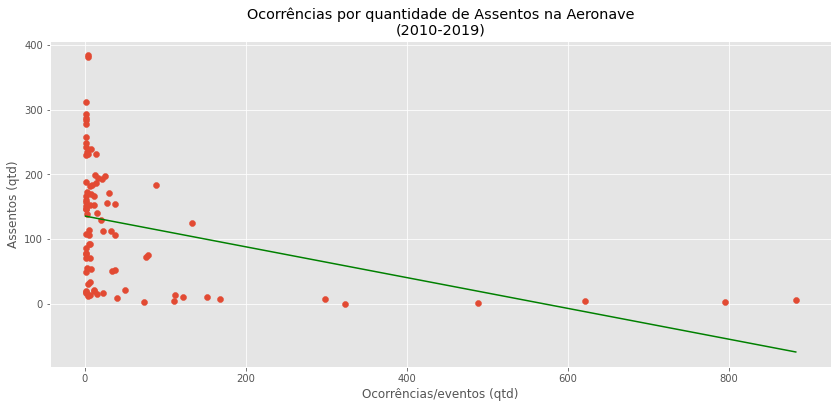

In [ ]:
# Criação do DataFrame
dataframe = pd.DataFrame()
dataframe['y'] = fase_aero_assentos
dataframe['x'] = contador_aero_assentos
x_values = dataframe[['x']]
y_values = dataframe[['y']]

# plotando o gráfico da regressão
plt.figure(figsize=(14,6))
plt.scatter(dataframe['x'].values, dataframe['y'].values)

# traçando a linha da regressão
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)

# plotando um gráfico em cima do outro
plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'green')

# Dando título a visualização
plt.title('Ocorrências por quantidade de Assentos na Aeronave\n(2010-2019)')
plt.ylabel('Assentos (qtd)')
plt.xlabel('Ocorrências/eventos (qtd)')

plt.show()

**Análise da Visualização**

O gráfico em questão tem como representação no **EIXO X** a quantidade de ocorrências (acidentes ou incidentes) aéreas relatadas e registradas de 2010 a 2019 no território brasileiro. Já o **EIXO Y** tem como representação a quantidade de assentos das aeronaves diante o momento da ocorrência. E exatamente ai que vemos que quanto mais assentos a aeronave possui, menor são as ocorrências.

- Ao analisar o gráfico, já conseguimos ter com clareza a informação de que quanto **menor** for o **número de assentos** em uma aeronave (pontos vermelhos), **maior** será a quantidade de **ocorrências**, ou seja, acidentes ou incidentes das aeronaves.

- Essa informação é de extrema importância, pois, é ai que profissionais e pesquisadores conseguem encontrar soluções ou alertas para uma maior avaliação preventiva das aeronaves.

**Curiosidade:**
- Antônio José, funcionário aposentado do Departamento de Controle do Espaço Aéreo, explica a divisão por categorias: “A classificação é feita em função da quantidade de passageiros e do peso que a aeronave pode carregar”, diz o antigo Supervisor e Instrutor de órgãos de controle de tráfego aéreo. “Acima de 19 assentos, o avião é considerado comercial. Quanto mais pessoas, mais exigências a Anac impõe para que se possa decolar”. 

- créditos a: https://www.jornalopcao.com.br/reportagens/por-que-acidentes-com-avioes-pequenos-sao-maioria-364152/

In [ ]:
import statsmodels.api as sm

X = dadosCenipa['aeronave_ano_fabricacao']
y = dadosCenipa['aeronave_assentos']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      aeronave_assentos   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.873
Date:                Wed, 01 Jun 2022   Prob (F-statistic):             0.0902
Time:                        00:40:16   Log-Likelihood:                -28397.
No. Observations:                5242   AIC:                         5.680e+04
Df Residuals:                    5240   BIC:                         5.681e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**OLS Regression Results**

- A análise de regressão linear gera uma equação que descreve a relação estatística entre uma ou mais variáveis preditoras e a variável resposta. A regressão linear encontra a linha que melhor representa as variáveis de entrada com a variável de saída.

- O *OLS Regression Results* A regressão de mínimos quadrados ordinários (OLS) nos auxilia a estimar os coeficientes de equações de regressão linear que descrevem a relação entre uma ou mais variáveis


---

# **Considerações Finais das Analises**

Todo levantamento estatístico foi feito diretamente da base de dados de **Ocorrências Aéreas de 2010 a 2019**, disponibilizadas pelo **CENIPA**, que é o órgão do Comando da Aeronáutica responsável pelas atividades de investigação de acidentes aeronáuticos da aviação civil e da Força Aérea Brasileira.

Buscamos demosntrar no projeto, de forma visual e gráfica, as principais informações contidas na base, essas as quais não seriam possíveis ou teriam um tempo de verificação maior se fosse via ferramenta de planilhas.

Os filtros com maior relevância nas ocorrências deste período foram:
- **Principais motivos das ocorrências:**
  - Observamos que de 2010 a 2019, a ocorrência que mais se relatou totalizando **632** casos foi **Falha no Motor em Voo**, equivalente a **12.05%** do total.

- **Horário das Ocorrências:**
  - Vemos que hoje em dia muita pessoas tem medo de voar durante a noite e ao analisar o gráfico, notamos que horário em que mais relataram ocorrências foi **00:00** com **160** casos.

- **País-Fabricante das Aeronaves:**
  - Durante a analise, fica claro que das aeronaves envolvidas em incidentes pertencem ao **Brasil** o total de **5139** casos, sendo equivalente a exatos **98%** do total de ocorrências.

- **Fase da Operação no momento da ocorrência:**
  - Conseguimos verificar que as 3 fases de operação em que mais obtiveram ocorrências envolvidas foi **Pouso (910)**, **Decolagem (852)** e **Cruzeiro (744)**, ambas equivalem a **47.8%** do total.



---

# **Conclusão do Grupo**



A execução deste projeto teve um pouco de frustrações e "turbulências" ao longo do caminho, mas, com foco e objetivo no resultado final e claro a ajuda do grupo, foi possível o desenvolvimento de forma ilustrativa e gráfica, o quadro de informações da Aviação Brasileira nas ocorrências durante o período de 2010 a 2019.

É de extrema importância que as visualizações criadas (códigos e demais descrições) foram baseadas totalmente em cima dos dados coletados pelo CENIPA conforme clareza no inicio do projeto. Qualquer conteúdo que necessitou de pesquisa por fora, ou seja, no Google, deixamos abaixo as referências bibliográficas para dar o crédito a todos os desenvolvedores de conteúdos do país e mundo.

Nosso grupo teve como objetivo principal neste projeto, colocar em prática o máximo de conteúdo aprendido em aulas com o Professor Edson, sendo tanto em código para a elaboração dos gráficos, como na interpretação dos dados e conseguir compor as descrições que estão presentes logo após cada visualização.

Finalizando, o que temos a dizer é que o objetivo foi concluído, conseguimos trazer as principais analises dos dados onde pudemos ver mais detalhadamente assuntos como Principais motivos das ocorrências, Horário das Ocorrências,
País-Fabricante das Aeronaves que estavam envolvidas nos acidentes, Fase da Operação no momento da ocorrência e até mesmo status das Investigações. Todos os gráficos elaborados são muito mais do que apenas uma visualização, dados podem trazer soluções, descobertas, entre demais resultados positivos para a ciência.


----------------------------------------------
# **Referências Bibliográficas**

Abaixo temos todos os sites, livros, artigos, entre demais link de conteúdos acessados das pesquisas que comporam este trabalho.

* CENIPA, **FCA 58-1 Ocorrências Aeronáuticas**: Panorama Estatístico da Aviação Brasileira. 118p. Centro de Investigações 
e Prevenção de Acidentes Aeronáuticos. 2016.

* SANTIAGO Luiz. **Entendendo a biblioteca NumPy**. MEDIUM, 2018. Disponível em: https://medium.com/ensina-ai/entendendo-a-biblioteca-numpy-4858fde63355. Acesso em: 29 de Março, 2022.

* RIBEIRO, Lucas. **Introdução a Biblioteca Pandas**. MEDIUM, 2020. Disponível em: https://medium.com/tech-grupozap/-introdu%C3%A7%C3%A3o-a-biblioteca-pandas-89fa8ed4fa38. Acesso em: 30 de Março, 2022.

* LIMA, Stefani. **Visualização de dados em Python: Matplotlib**. KINGHOST, 2018. Disponível em: https://king.host/blog/2018/03/visualizacao-de-dados-matplotlib/#:~:text=O%20Matplotlib%20%C3%A9%20uma%20biblioteca,pizza%2C%20histogramas%20entre%20outras%20op%C3%A7%C3%B5es. Acesso em: 03 de Abril, 2022.

* SATIAM, Kumar. **Visualização de Dados com Python Seaborn e Pandas**. ACERVOLIMA, [Sem data]. Disponível em: https://acervolima.com/visualizacao-de-dados-com-python-seaborn-e-pandas/#:~:text=Seaborn%20%C3%A9%20uma%20biblioteca%20de,estruturas%20de%20dados%20dos%20pandas%20. Acesso em: 03 de Abril, 2022.

* DE MENEZES, Telmo. **A biblioteca SciPy**. GITHUB, 2021. Disponível em: https://tmfilho.github.io/pyestbook/math/03_scip.html#:~:text=A%20biblioteca%20SciPy%20disponibiliza%20muitas,otimiza%C3%A7%C3%A3o%2C%20%C3%A1lgebra%20linear%20e%20Estat%C3%ADstica. Acesso em: 03 de Abril, 2022.

* ADITYANAGRAJ. **Pywaffle em Python**. ACERVOLIMA, [Sem data]. Disponível em: https://acervolima.com/gerar-grafico-waffle-usando-pywaffle-em-python/#:~:text=Um%20gr%C3%A1fico%20de%20waffle%20%C3%A9,um%20ponto%20percentual%20totalizando%20100%25. Acesso em: 29 de Maio, 2022.

* PYTHON. **Collections — Tipos de dados do contêiner**. [S.I.], [?]. Disponível em:
https://docs.python.org/3/library/collections.html. Acesso em: 29 de Maio, 2022

* STATSMODELS. **Statsmodels: Statistical models, hypothesis tests, and data exploration**. [S.I.], [?]. Disponível em: https://www.statsmodels.org/stable/index.html#>. Acesso em: 30 de Maio, 2022